#ExtraaLearn Project Outline

Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

The customer interacts with the marketing front on social media or other online platforms.
The customer browses the website/app and downloads the brochure
The customer connects through emails for more information.
The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
Find the factors driving the lead conversion process
Create a profile of the leads which are likely to convert
Data Description
The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.



Data Dictionary

ID: ID of the lead

age: Age of the lead

current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'

first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'

profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)

website_visits: How many times has a lead visited the website

time_spent_on_website: Total time spent on the website

page_views_per_visit: Average number of pages on the website viewed during the visits.

last_activity: Last interaction between the lead and ExtraaLearn.

  Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
  
  Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
  
  Website Activity: Interacted on live chat with representative, Updated profile on website, etc

print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.

status: Flag indicating whether the lead was converted to a paid customer or not.

#Importing necessary libraries and data

In [978]:
#Librbary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn.metrics as metrics
import statsmodels.stats.api as sms
import statsmodels.api as sm

#Tune, metric scores and split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

#Data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

#Missing Values
from sklearn.impute import SimpleImputer

#Model Building
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree

#Stat model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)

#Model Tuning
from sklearn.model_selection import GridSearchCV

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x )

In [979]:
from google.colab import files
uploaded = files.upload()

Saving ExtraaLearn.csv to ExtraaLearn (12).csv


In [980]:
data = pd.read_csv('ExtraaLearn.csv')


#Data Overview

In [981]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

(4612, 15)

In [982]:
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [983]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [984]:
data.head(3)

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639               1.86100   
1               2                     83               0.32000   
2               3                    330               0.07400   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0

In [985]:
data.tail(3)

ID  age current_occupation first_interaction profile_completed  \
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4609               2                    212               2.69200   
4610               1                    154               3.87900   
4611               4                   2290               2.07500   

         last_activity print_media_type1 print_media_type2 digital_media  \
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

In [986]:
data.duplicated(['ID']).sum()

0

Performing a data overview check reveals that our dataset largely consist of metrics used to describe our customer base, onnline activy and conversion trends. Our data has 15 columns and 4612 rows. Further examination reveals no missing or duplicate metrics.

#Exploratory Data Analysis (EDA)



In [987]:
cat_col=['current_occupation','first_interaction','profile_completed', 'last_activity','print_media_type1','print_media_type2',	'digital_media', 'educational_channels','referral', 'status']
num_col=['age','website_visits','time_spent_on_website','page_views_per_visit']

In [988]:
data.describe([])

age  website_visits  time_spent_on_website  page_views_per_visit  \
count 4612.00000      4612.00000             4612.00000            4612.00000   
mean    46.20121         3.56678              724.01127               3.02613   
std     13.16145         2.82913              743.82868               1.96812   
min     18.00000         0.00000                0.00000               0.00000   
50%     51.00000         3.00000              376.00000               2.79200   
max     63.00000        30.00000             2537.00000              18.43400   

          status  
count 4612.00000  
mean     0.29857  
std      0.45768  
min      0.00000  
50%      0.00000  
max      1.00000

In [989]:
data.describe(include=['object']).T

count unique             top  freq
ID                    4612   4612          EXT001     1
current_occupation    4612      3    Professional  2616
first_interaction     4612      2         Website  2542
profile_completed     4612      3            High  2264
last_activity         4612      3  Email Activity  2278
print_media_type1     4612      2              No  4115
print_media_type2     4612      2              No  4379
digital_media         4612      2              No  4085
educational_channels  4612      2              No  3907
referral              4612      2              No  4519

The following information can be inferred from our data.The majority of ourpotential customers take the time to finish their profiles, are professionals, and interact via the website. The average user is middle aged, visits the website 3-4 times, view 2-3 pages  

EDA of Categorical values

In [990]:
for column in cat_col:
  print(data[column].value_counts(normalize=True))
  print("-"*50)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
-----------------

In [991]:
#def stacked_barplot(data, predictor, target, figsize=(7,5)):
  #(pd.crosstab(data[predictor], data[target], normalize='index')*100).plot(kind='bar', figsize=figsize, stacked=True)
  #plt.legend(loc="upper right")
  #plt.ylabel(target)


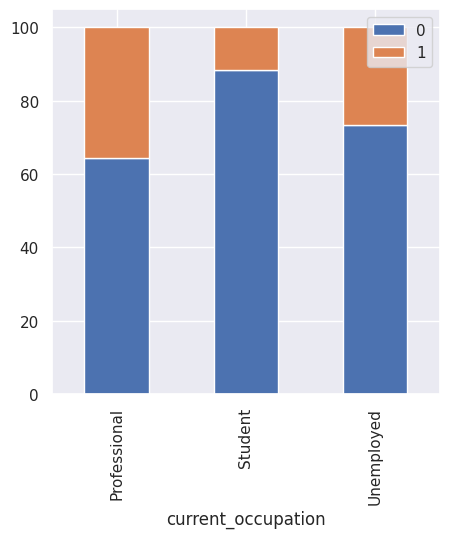

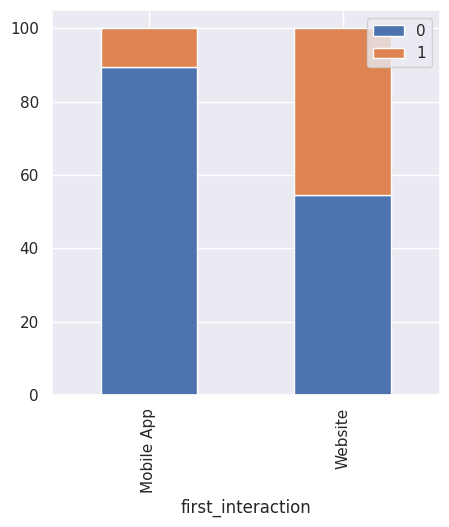

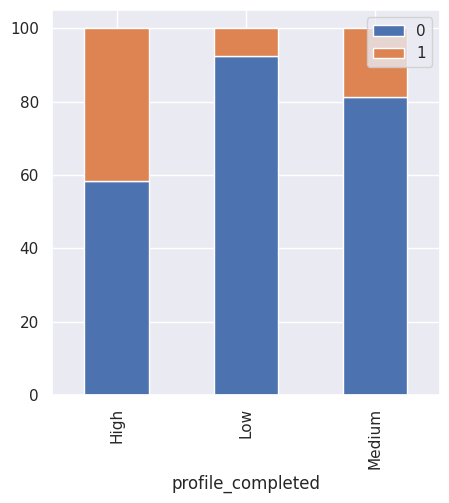

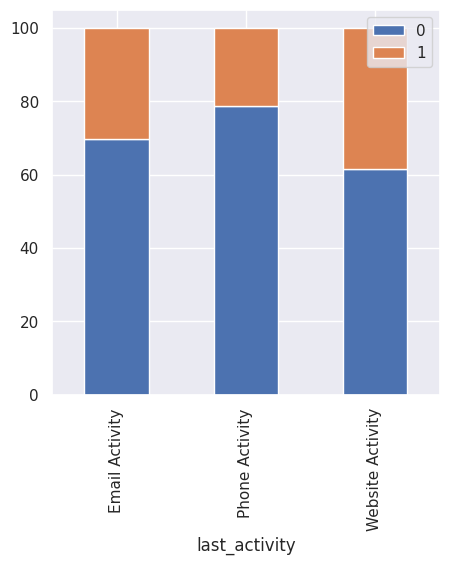

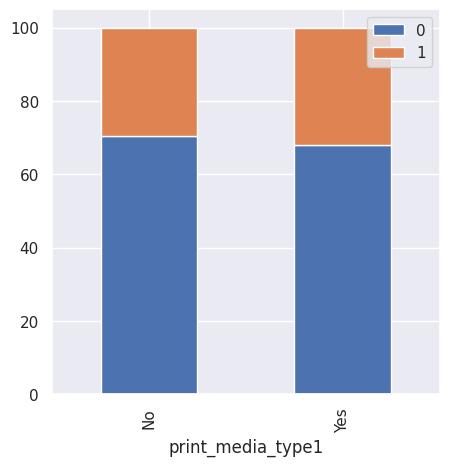

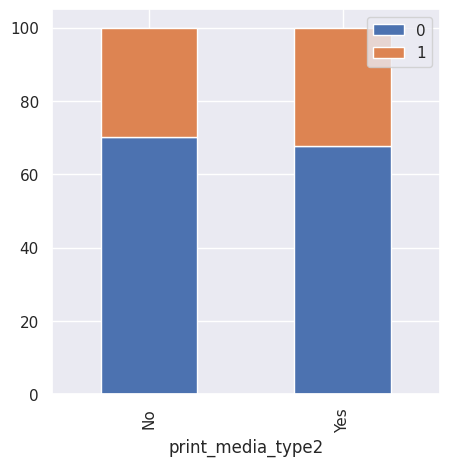

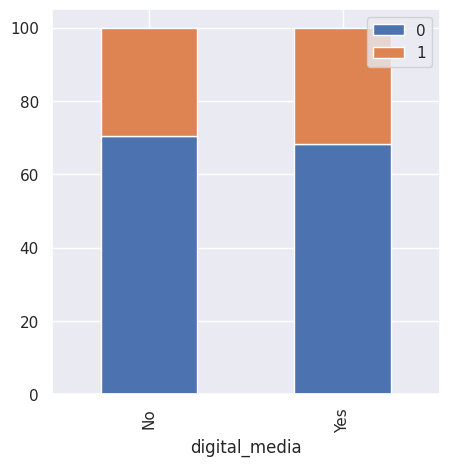

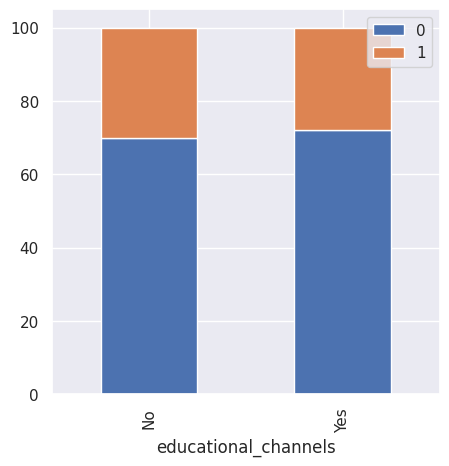

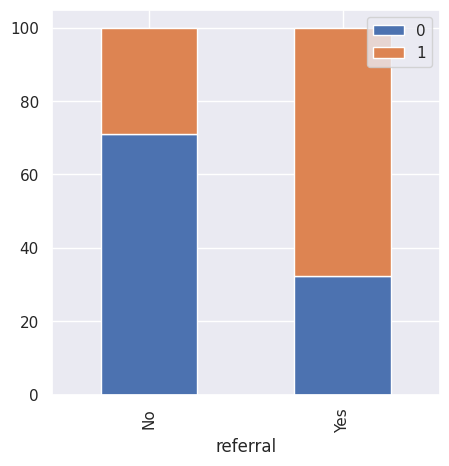

In [992]:
for i in cat_col:
  if i!='status':
    (pd.crosstab(data[i], data['status'], normalize='index')*100).plot(kind='bar', figsize=(5,5), stacked=True)
    plt.legend(loc="upper right")

According to this data our mobile app based conversion attempts are largely inaffective. With Website as the first interactive being 35% more likely to result in a conversion,  as well as website as the last activity being 10% more effective than our next leading activity type.  By far the mostly likely of our catergorical values to result in conversion is the presence of a referral from a previous customer, which increases the chance of conversion by 40%.

EDA of Numeric values

In [993]:
def hist_box(data, col, figsize=(12,7), kde=False):
  f, (ax_box, ax_hist) = plt.subplots(
      nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},
      figsize=figsize,)
  sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
  sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
  ax_box.set(xlabel=col)
  ax_hist.axvline(
      data[col].mean(), color="green", linestyle="--"
  )
  ax_hist.axvline(
      data[col].median(), color="black", linestyle="-"
  )
  min_y, max_y = ax_hist.get_ylim()
  ax_hist.set_ylim(bottom=min(min_y, -10))

  ax_box.set(xlabel='')
  ax_hist.set(xlabel=col)
  ax_hist.legend()

  plt.show

In [994]:
data.groupby(['status'])[num_col].mean()

age  website_visits  time_spent_on_website  page_views_per_visit
status                                                                      
0      45.15301         3.57898              577.42071               3.02573
1      48.66376         3.53813             1068.39797               3.02705

Visitors that eventually do convert spend almost twice the amount of time, on average, as those who do not.

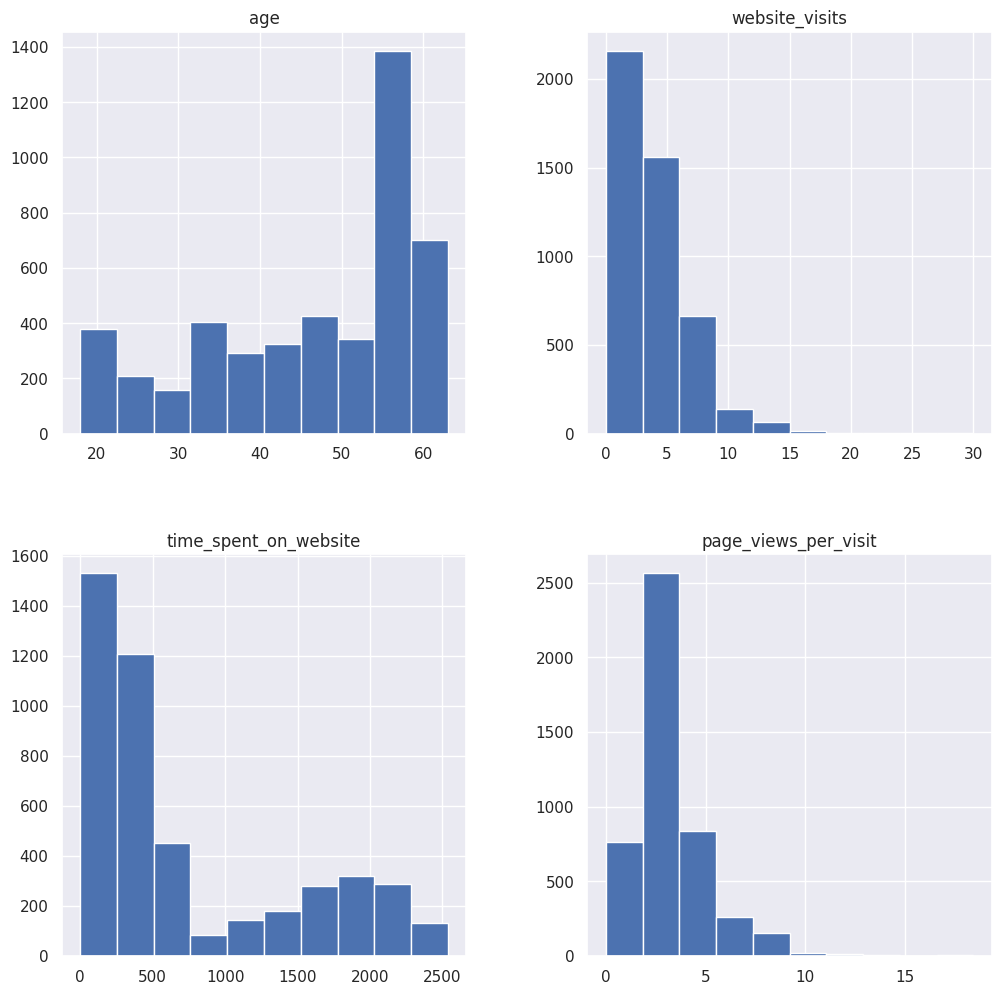

In [995]:
data[num_col].hist(figsize=(12,12))
plt.show()

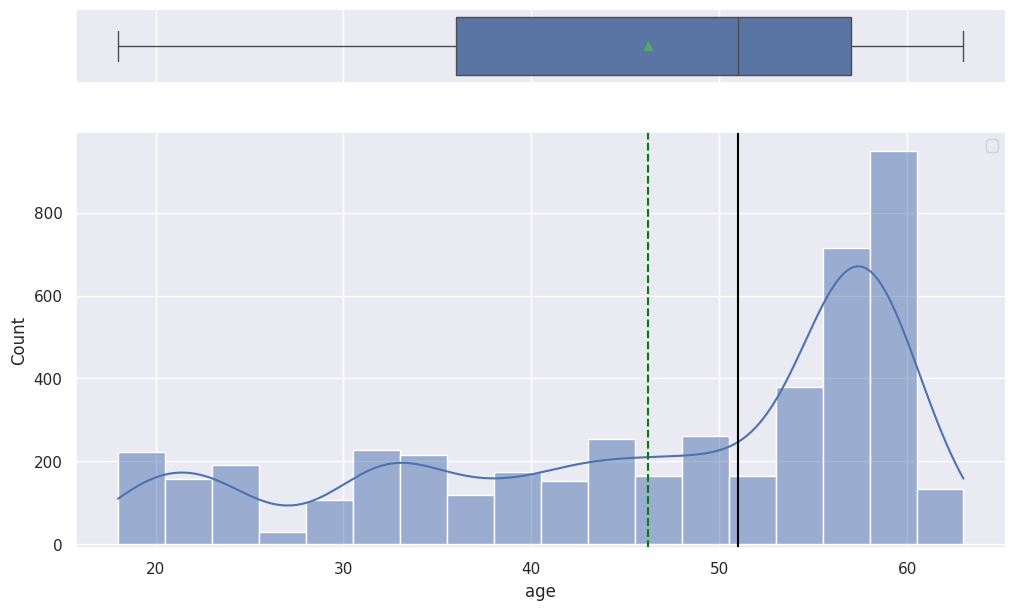

In [996]:
hist_box(data, "age")

Is it more likely that someone who visits our website is between 50 and 60.

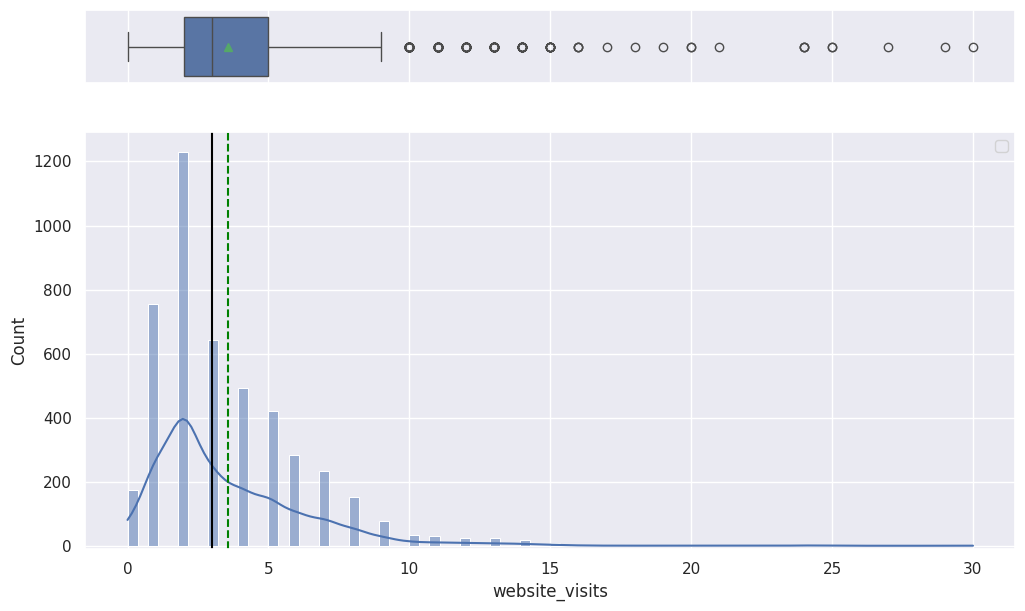

In [997]:
hist_box(data, "website_visits")

Is it more likely that a user visits the website 5 times or less


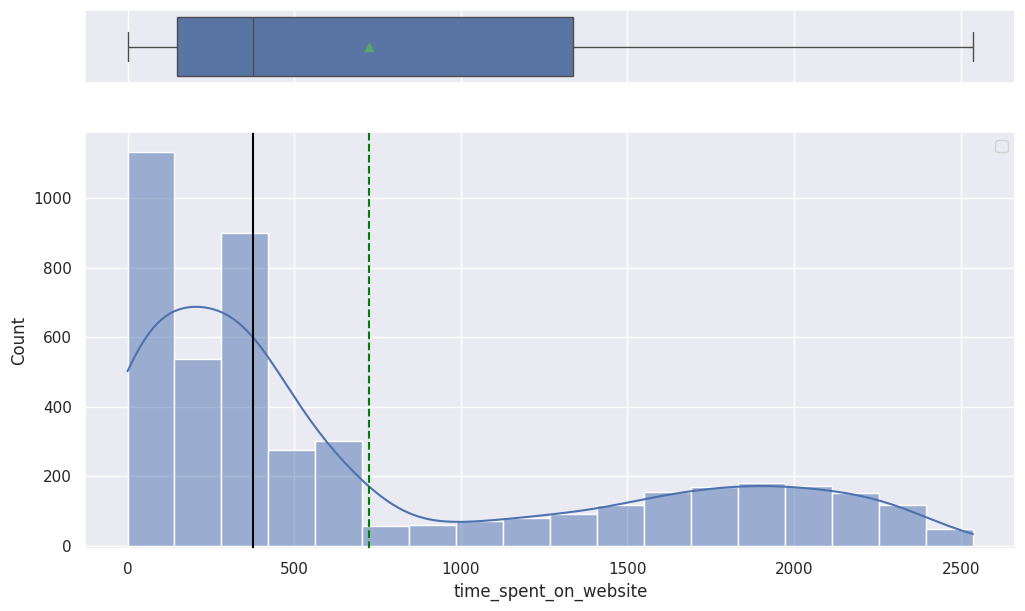

In [998]:
hist_box(data, "time_spent_on_website")

It is more likely for an individual to spend less that 500 minutes on our website, with our data being right skewed.

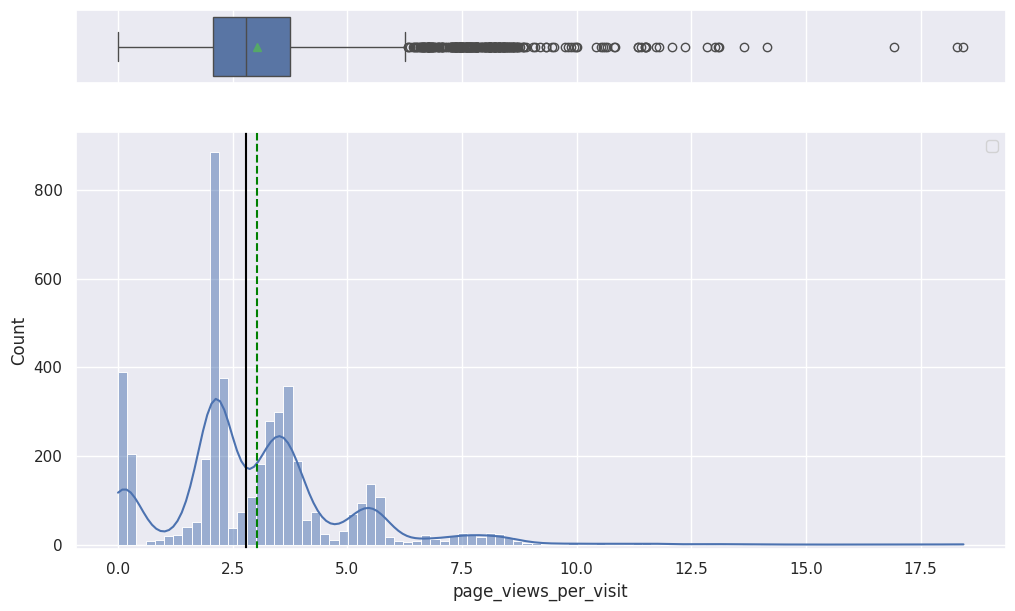

In [999]:
hist_box(data, "page_views_per_visit")

The majority of users will visit our website less than 4 pages

#EDA Continued

In [1000]:
#data[''].replace("No", 0, inplace=True)
#data[''].replace("Yes", 1, inplace=True)
data.drop(['ID'],axis = 1, inplace = True)
data['print_media_type1'].replace("No", 0, inplace=True)
data['print_media_type1'].replace("Yes", 1, inplace=True)
data['print_media_type2'].replace("No", 0, inplace=True)
data['print_media_type2'].replace("Yes", 1, inplace=True)
data['digital_media'].replace("No", 0, inplace=True)
data['digital_media'].replace("Yes", 1, inplace=True)
data['educational_channels'].replace("No", 0, inplace=True)
data['educational_channels'].replace("Yes", 1, inplace=True)
data['referral'].replace("No", 0, inplace=True)
data['referral'].replace("Yes", 1, inplace=True)


In [1001]:
print(data[cat_col].head())

  current_occupation first_interaction profile_completed     last_activity  \
0         Unemployed           Website              High  Website Activity   
1       Professional        Mobile App            Medium  Website Activity   
2       Professional           Website            Medium  Website Activity   
3         Unemployed           Website              High  Website Activity   
4            Student           Website              High    Email Activity   

   print_media_type1  print_media_type2  digital_media  educational_channels  \
0                  1                  0              1                     0   
1                  0                  0              0                     1   
2                  0                  0              1                     0   
3                  0                  0              0                     0   
4                  0                  0              0                     0   

   referral  status  
0         0       1  
1     

Removing the ID column as these unique identifiers are unnneccessary for our needs and replacing "YES" and "NO" categorical data with 1 and 0, respectively for analysis

EDA Part 2

<Axes: >

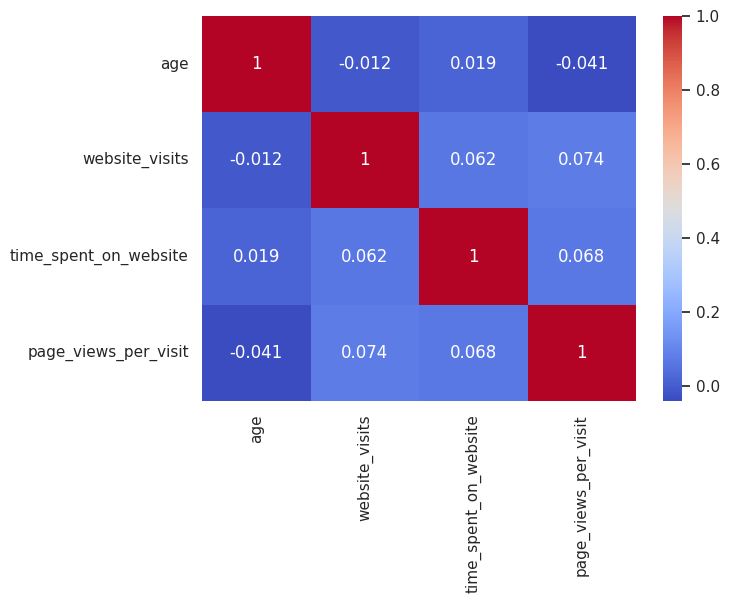

In [1002]:
plt.figure(figsize=(7,5))
sns.heatmap( data[num_col].corr(), annot=True, cmap='coolwarm')

While older individuals are slightly more likely to spend time on our website, they are less likely to view multiple web pages, and return. The may be an indicator to make our website more user friendly and appealing to older demographics to the interest,and an enhanced postitive feedback between the additional num_col metrics.

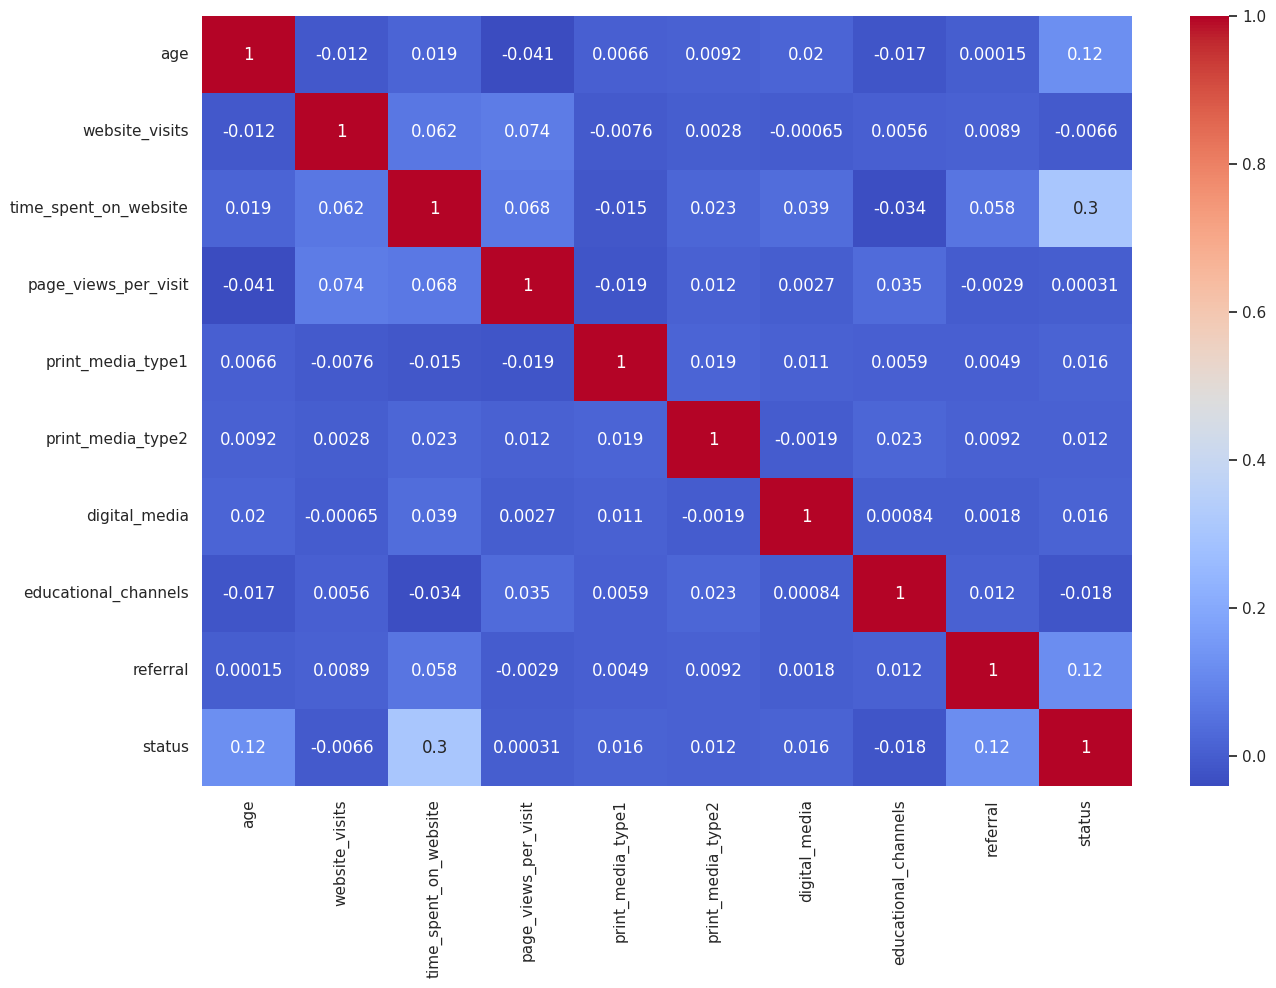

In [1003]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

According to our heatmap the varibles that have the largest correlation to a status conversion are "Time Spent on website", followed by "age" and "referral". In regards to our ineffective attempts by our worst preforming indicators is the education channel,  followed by our magazine advertising. Newpapers and digital media should be our focus going forward.

In [1004]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR


outliers = {}
for column in numeric_data.columns:
   columns_outliers = data[(data[column] < lower_bounds[column]) | (data[column] > upper_bounds[column])]
   outliers[column] = columns_outliers

outliers_summary = {col: len(outliers[col]) for col in outliers}
print("outliers_summary  (Number of Outliers per variable):")
print(outliers_summary)

outliers_summary  (Number of Outliers per variable):
{'age': 0, 'website_visits': 154, 'time_spent_on_website': 0, 'page_views_per_visit': 257, 'print_media_type1': 497, 'print_media_type2': 233, 'digital_media': 527, 'educational_channels': 705, 'referral': 93, 'status': 0}


In [1005]:
outlier_percentages = (
    (numeric_data < lower)
    | (numeric_data > upper)
).sum() / len(data) * 100

outlier_percentages

age                      0.00000
website_visits           3.33912
time_spent_on_website    0.00000
page_views_per_visit     5.57242
print_media_type1       10.77624
print_media_type2        5.05204
digital_media           11.42671
educational_channels    15.28621
referral                 2.01648
status                   0.00000
dtype: float64

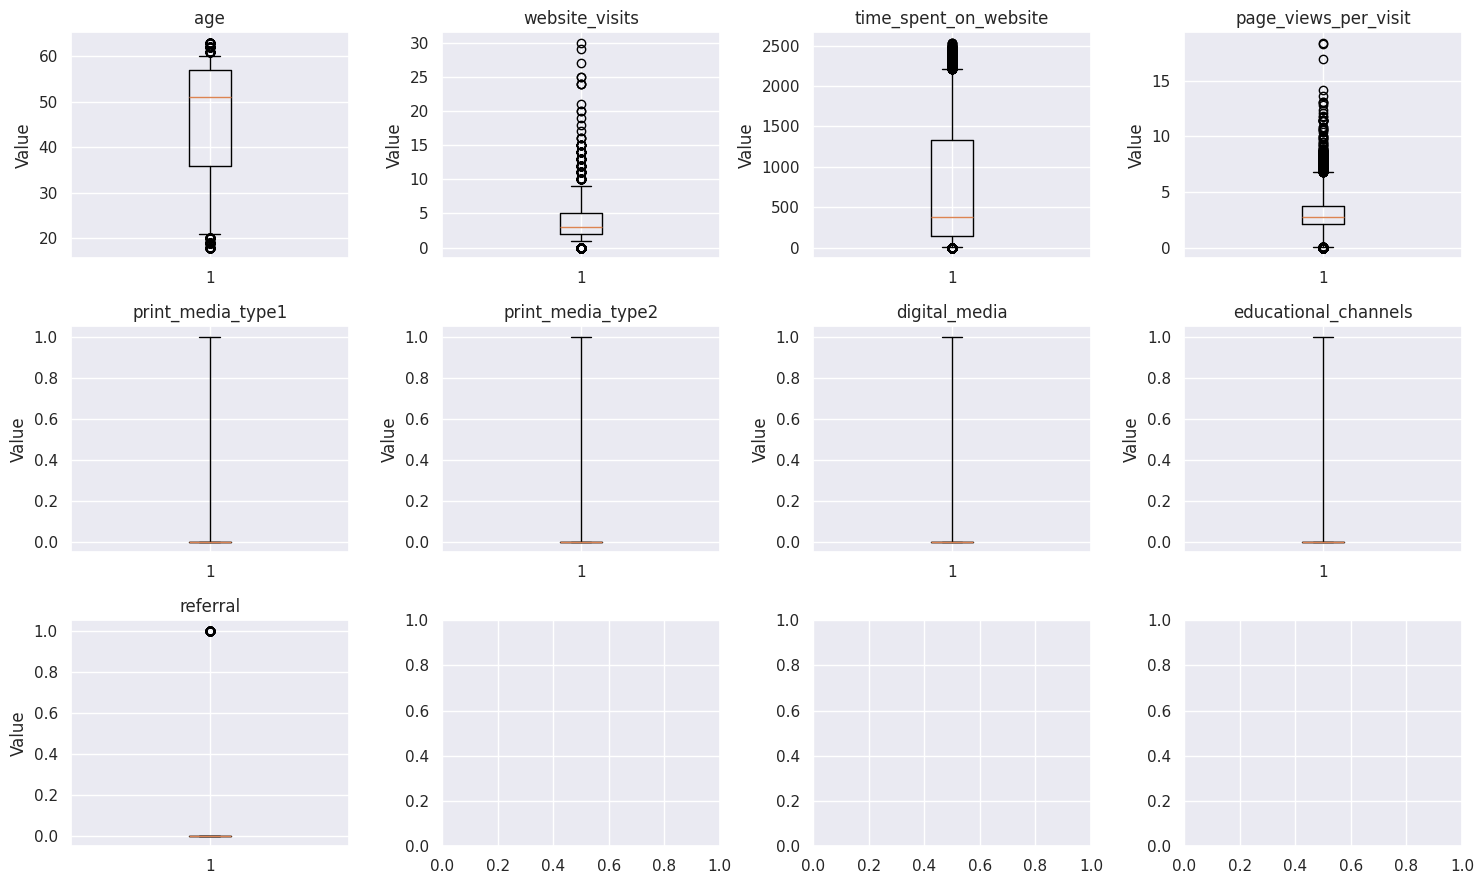

In [1006]:
from math import ceil
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

numeric_columns.remove("status")

n_cols = 4
n_rows = ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()
for i, variable in enumerate(numeric_columns):
    ax = axes[i]
    ax.boxplot(data[variable].dropna(),whis=[5, 95])
    ax.set_title(variable)
    ax.set_ylabel("Value")
    plt.tight_layout()

plt.tight_layout()
plt.show()

The column with the most outliers are website visits and pages visited

In [1007]:
data1 = data.copy()

In [1008]:
data1.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Our dataset has no missing values

In [1009]:

col_dummy=['current_occupation','first_interaction','profile_completed', 'last_activity']



In [1010]:
X = data1.drop(["status"], axis=1)
y = data1["status"]

In [1011]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y )

In [1012]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [1013]:
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [1014]:
# Scaling the data
sc = StandardScaler()

# Scale the training set
X_train_scaled = sc.fit_transform(X_train)

# Scale the testing data
X_test_scaled = sc.transform(X_test)

#Transform on test data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [1015]:
X_train.head(3)

age  website_visits  time_spent_on_website  page_views_per_visit  \
389    57               1                    582               2.19700   
1162   35               2                   1937               5.11100   
1057   53               5                   1554               2.12300   

      print_media_type1  print_media_type2  digital_media  \
389                   0                  0              0   
1162                  0                  0              1   
1057                  0                  0              0   

      educational_channels  referral  current_occupation_Student  \
389                      1         0                       False   
1162                     0         0                       False   
1057                     1         0                       False   

      current_occupation_Unemployed  first_interaction_Website  \
389                           False                      False   
1162                           True                       True   
1057                           True                       True   

      profile_completed_Low  profile_completed_Medium  \
389                   False                     False   
1162                  False                      True   
1057                  False                      True   

      last_activity_Phone Activity  last_activity_Website Activity  
389                          False                           False  
1162                         False                           False  
1057                         False                           False

In [1016]:
X_train.tail(3)

age  website_visits  time_spent_on_website  page_views_per_visit  \
2441   47               2                   1605               3.70600   
438    56               7                    242               5.55200   
2455   29               4                    139               3.64800   

      print_media_type1  print_media_type2  digital_media  \
2441                  0                  0              0   
438                   1                  0              0   
2455                  0                  0              0   

      educational_channels  referral  current_occupation_Student  \
2441                     0         0                       False   
438                      0         0                       False   
2455                     0         0                       False   

      current_occupation_Unemployed  first_interaction_Website  \
2441                          False                      False   
438                            True                      False   
2455                          False                      False   

      profile_completed_Low  profile_completed_Medium  \
2441                  False                      True   
438                   False                      True   
2455                  False                      True   

      last_activity_Phone Activity  last_activity_Website Activity  
2441                         False                           False  
438                          False                           False  
2455                         False                            True

Building the model

In [1017]:
#Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [1018]:
#Fitting logistics regression model

lg = LogisticRegression(random_state=1)
lg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=1)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2264
           1       0.73      0.64      0.68       964

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



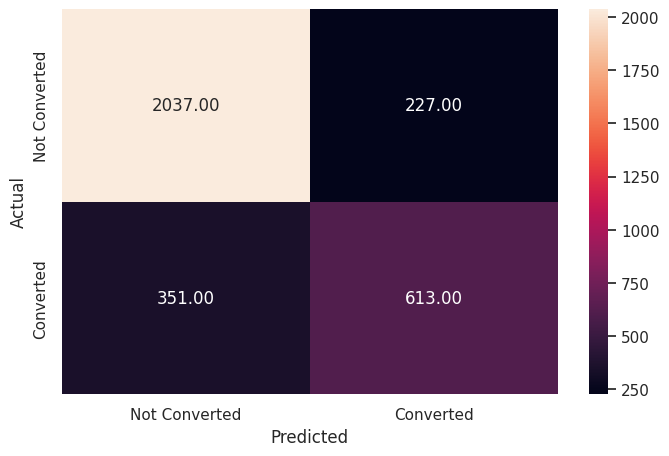

In [1019]:
y_pred_train = lg.predict(X_train_scaled)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       971
           1       0.75      0.63      0.69       413

    accuracy                           0.83      1384
   macro avg       0.80      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



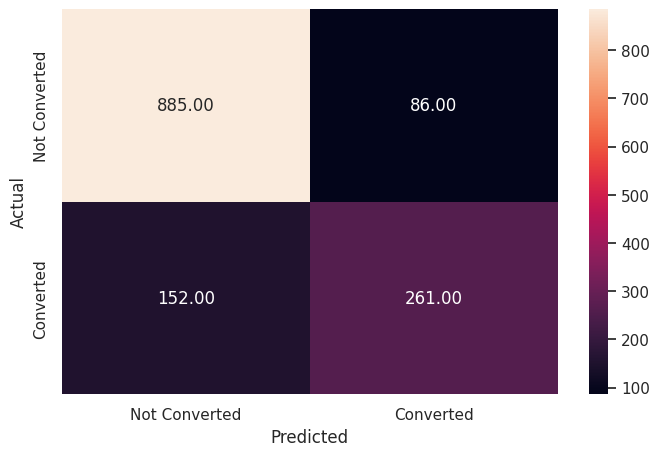

In [1020]:
y_pred_test = lg.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)

In [1021]:
cols=X_train_scaled.columns
coef_lg=lg.coef_
pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False)

0
first_interaction_Website       1.30050
time_spent_on_website           0.86510
last_activity_Website Activity  0.24878
referral                        0.20182
age                             0.07918
educational_channels            0.04221
print_media_type2               0.03230
digital_media                   0.02524
print_media_type1               0.02474
page_views_per_visit           -0.03664
website_visits                 -0.06659
current_occupation_Unemployed  -0.27843
last_activity_Phone Activity   -0.33246
profile_completed_Low          -0.40416
current_occupation_Student     -0.58011
profile_completed_Medium       -0.80925

In [1022]:
odds = np.exp(lg.coef_[0])
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)


odds
first_interaction_Website      3.67115
time_spent_on_website          2.37524
last_activity_Website Activity 1.28245
referral                       1.22363
age                            1.08240
educational_channels           1.04311
print_media_type2              1.03282
digital_media                  1.02556
print_media_type1              1.02505
page_views_per_visit           0.96402
website_visits                 0.93558
current_occupation_Unemployed  0.75697
last_activity_Phone Activity   0.71716
profile_completed_Low          0.66754
current_occupation_Student     0.55984
profile_completed_Medium       0.44519

*  If individual first interaction is on a
website they are 3.6 times more active to convert to our services
*  The is a positive relationship btween time spent online and conversion
* If the last activity type that an individual had was a website they are 1.28 more likely to convert
*  Referred individuals are more than 1.2 times likely to converted

<function matplotlib.pyplot.show(close=None, block=None)>

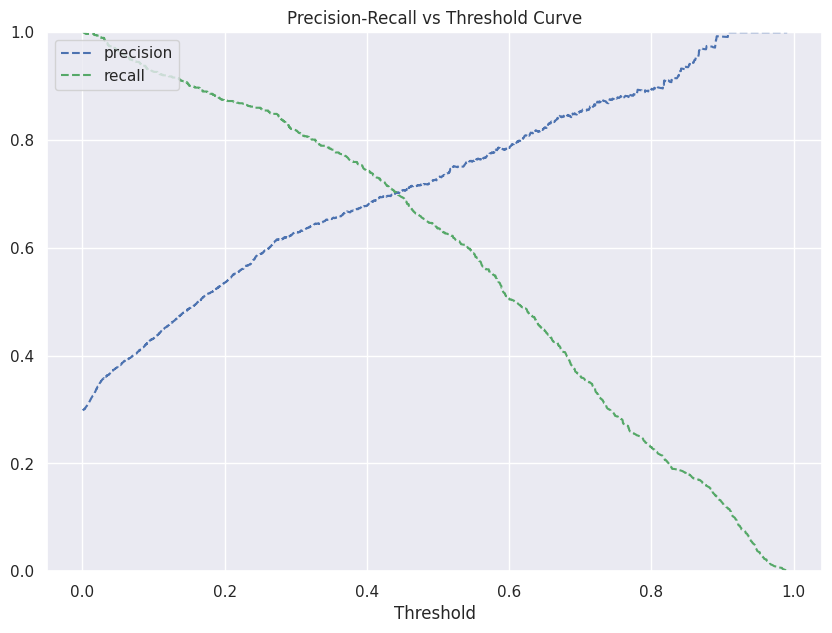

In [1023]:
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

plt.figure(figsize=(10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.title("Precision-Recall vs Threshold Curve")
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show

In [1024]:
#Threshold calc

for i in np.arange(len(thresholds_lg)):
  if precisions_lg[i]==recalls_lg[i]:
    print(thresholds_lg[i])

0.4416935999542943


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2264
           1       0.70      0.70      0.70       964

    accuracy                           0.82      3228
   macro avg       0.79      0.79      0.79      3228
weighted avg       0.82      0.82      0.82      3228



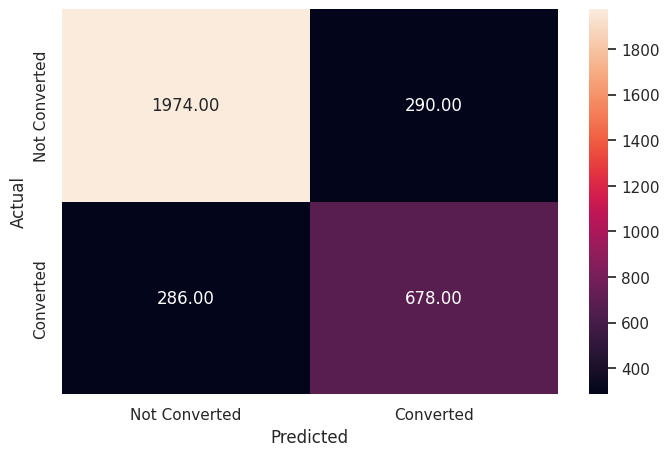

In [1025]:
optimal_threshold=.44
y_prob_train = lg.predict_proba(X_train_scaled)
metrics_score(y_train, y_prob_train[:,1]> optimal_threshold)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       971
           1       0.71      0.69      0.70       413

    accuracy                           0.83      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.82      0.83      0.83      1384



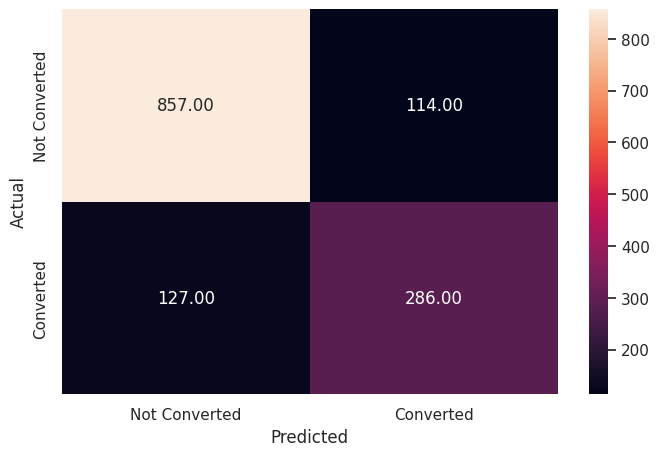

In [1026]:
optimal_threshold=.44
y_prob_test = lg.predict_proba(X_test_scaled)
metrics_score(y_test, y_prob_test[:,1]> optimal_threshold)

# SVM

In [1027]:
#Trying SVM training to see if the results are better

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [1028]:
#Fitting SVM

svm = SVC(kernel = 'linear')
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2264
           1       0.72      0.68      0.70       964

    accuracy                           0.82      3228
   macro avg       0.79      0.78      0.79      3228
weighted avg       0.82      0.82      0.82      3228



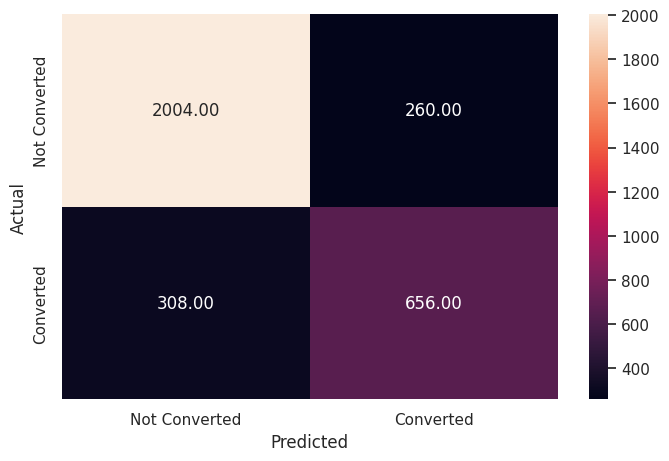

In [1029]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       971
           1       0.73      0.68      0.70       413

    accuracy                           0.83      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.83      0.83      0.83      1384



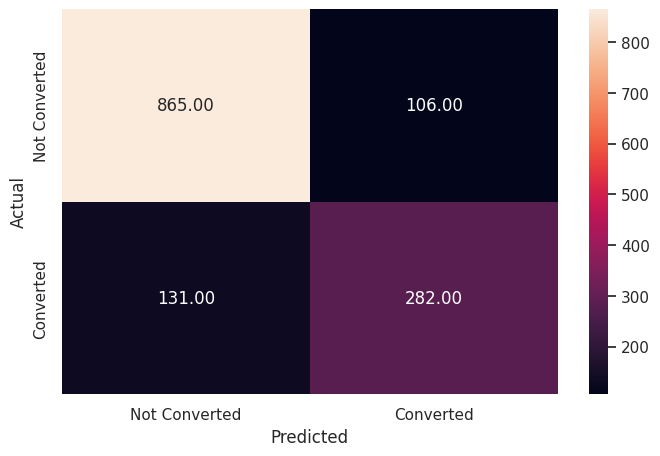

In [1030]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

In [1031]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

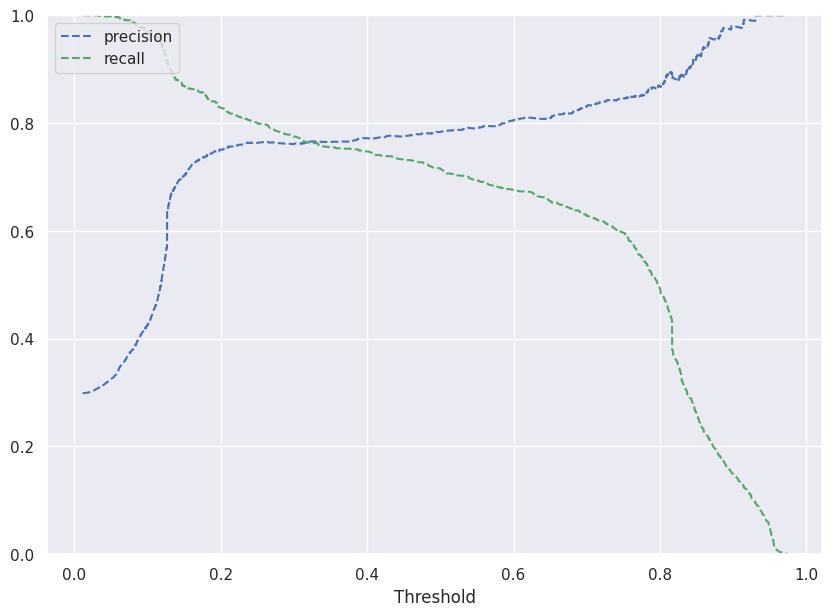

In [1032]:
#svm_rbf=SVC(kernel='rbf',probability=True)
#svm_rbf.fit(X_train_scaled, y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])


plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [1049]:
for i in np.arange(len(thresholds_svm)):
  if precisions_svm[i]==recalls_svm[i]:
    print(thresholds_svm[i])


0.31867626076430244


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2264
           1       0.76      0.76      0.76       964

    accuracy                           0.86      3228
   macro avg       0.83      0.83      0.83      3228
weighted avg       0.86      0.86      0.86      3228



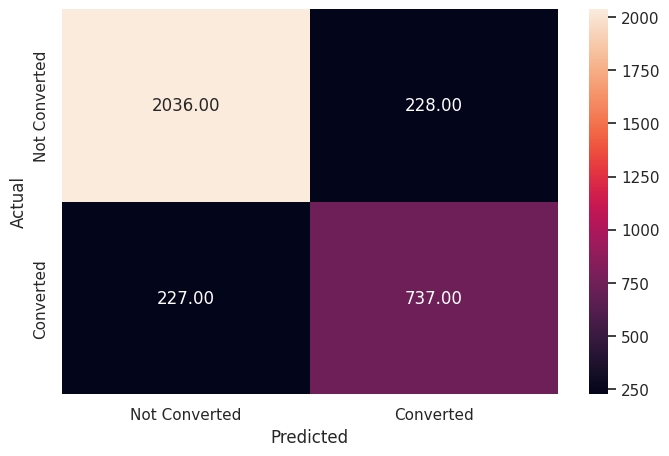

In [1050]:
optimal_threshold_svm=.318
y_pred_train = svm_rbf.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       971
           1       0.72      0.71      0.72       413

    accuracy                           0.83      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



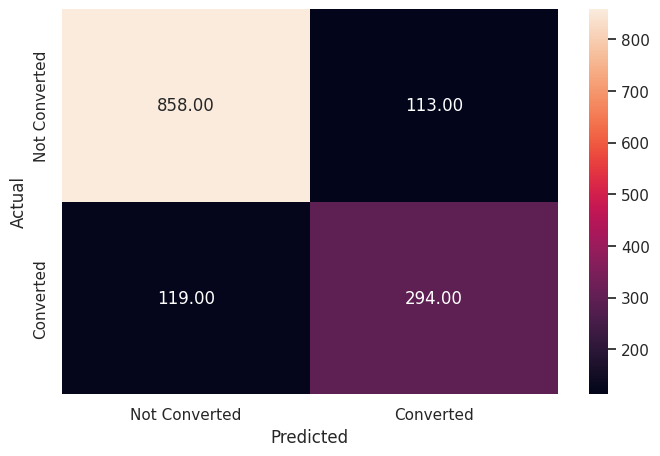

In [1051]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

* As the accuracy of this model is below 85 percent I would not recommend it for predicting conversion.

#Decision Tree

In [1036]:
model_dt = DecisionTreeClassifier(class_weight = {0: 0.71, 1: 1.67}, random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.71, 1: 1.67}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



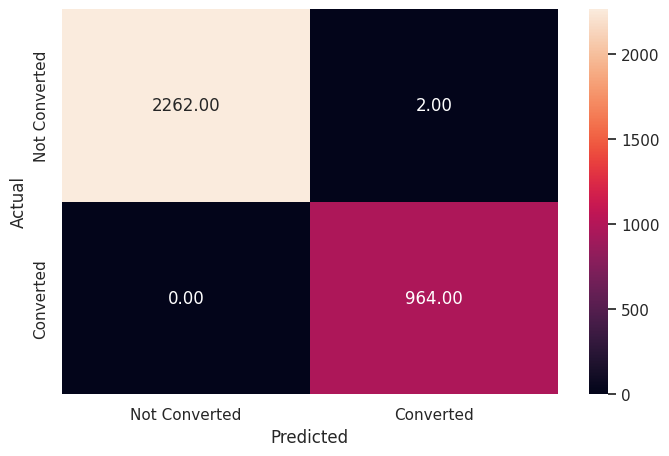

In [1037]:
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       971
           1       0.67      0.63      0.65       413

    accuracy                           0.80      1384
   macro avg       0.76      0.75      0.75      1384
weighted avg       0.79      0.80      0.79      1384



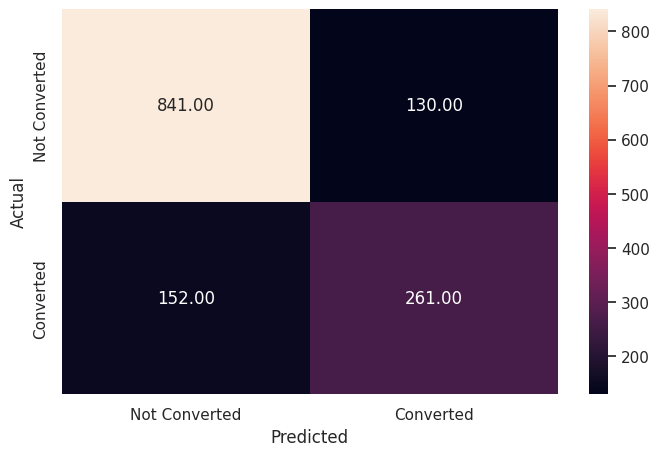

In [1038]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

<function matplotlib.pyplot.show(close=None, block=None)>

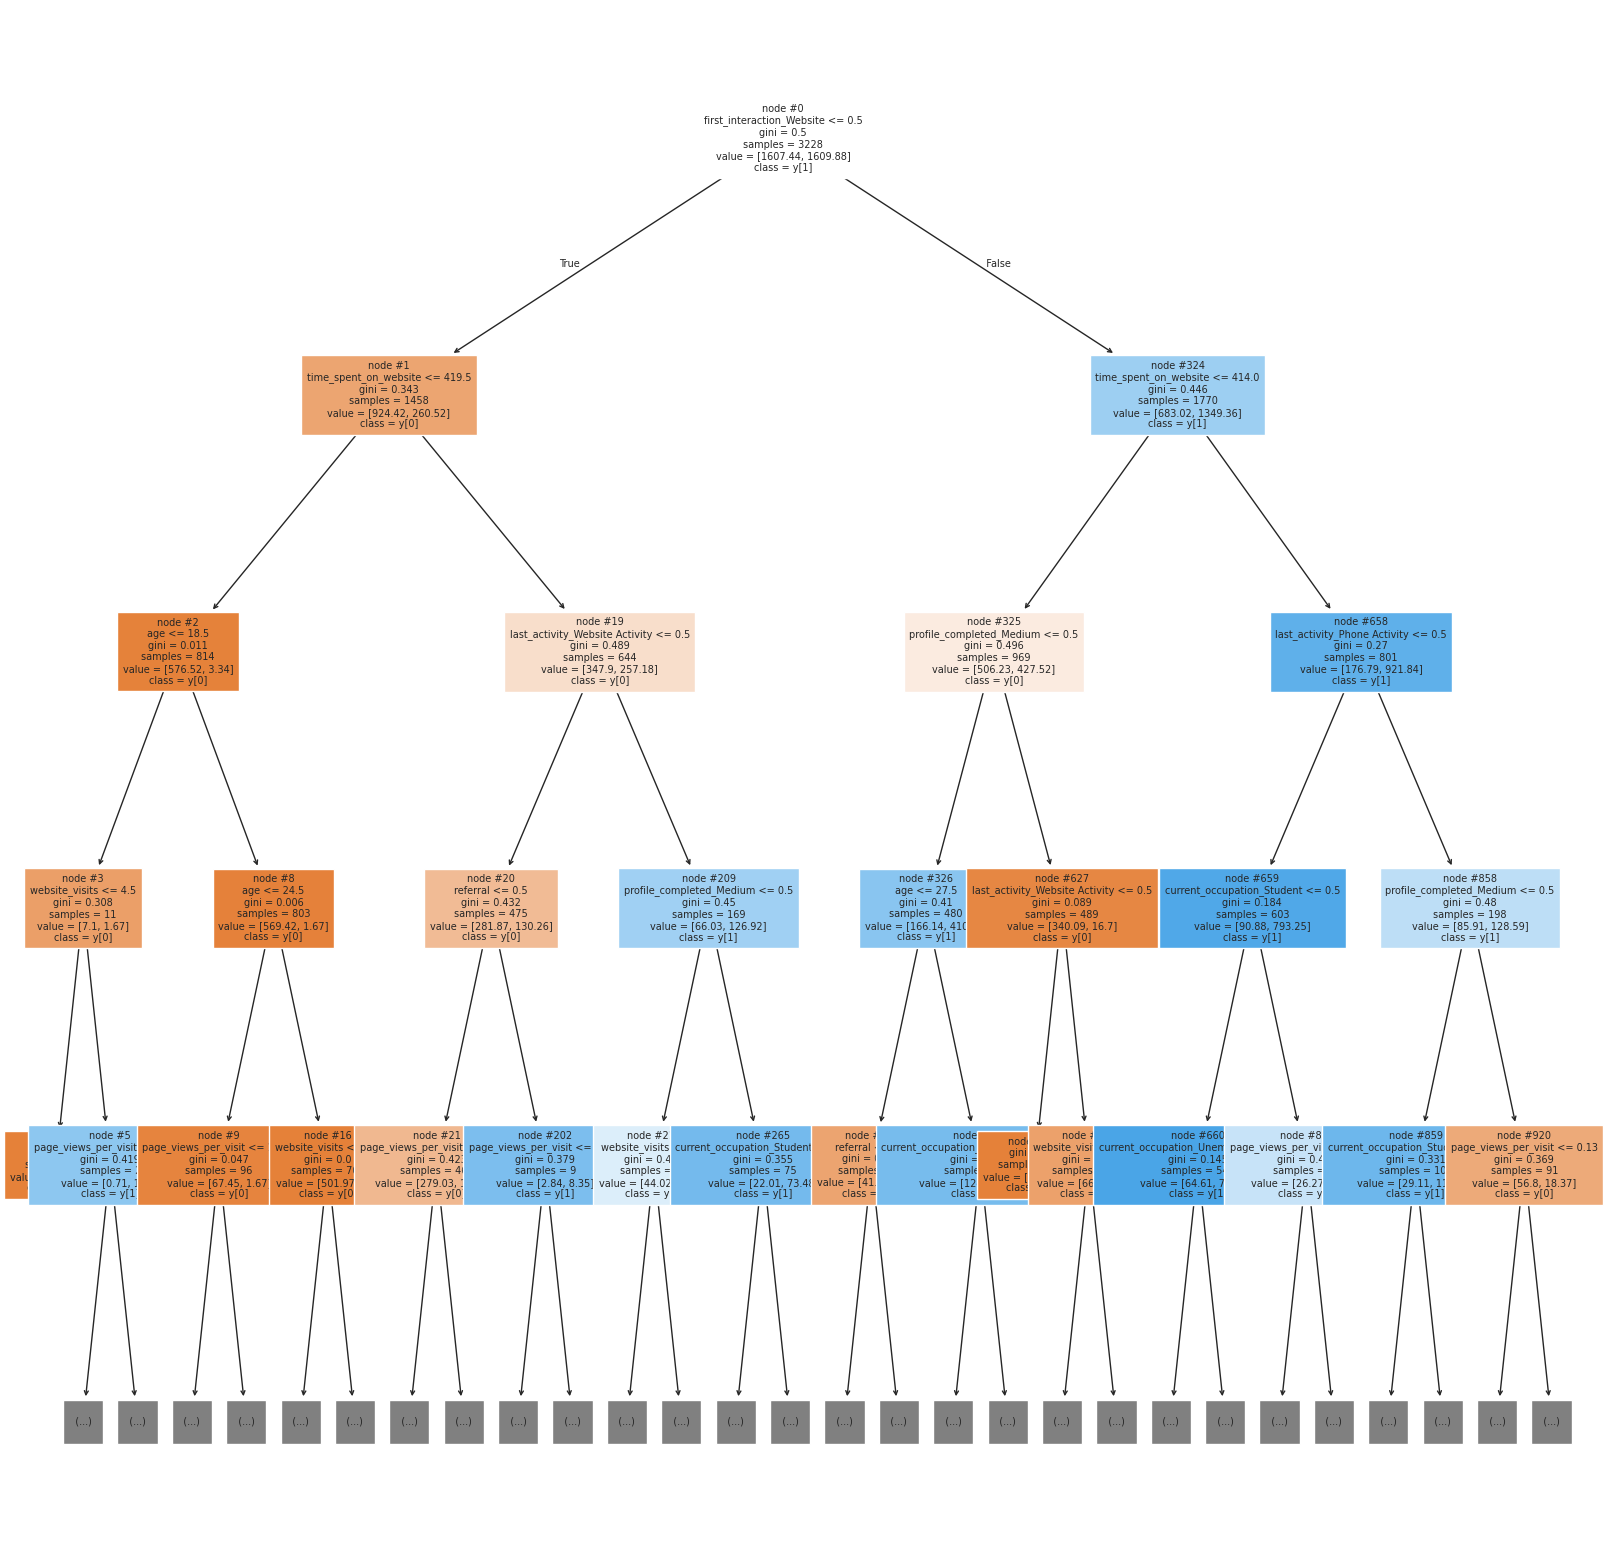

In [1039]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt, feature_names=features, max_depth =4, filled=True, fontsize=7, node_ids=True, class_names=True)
plt.show

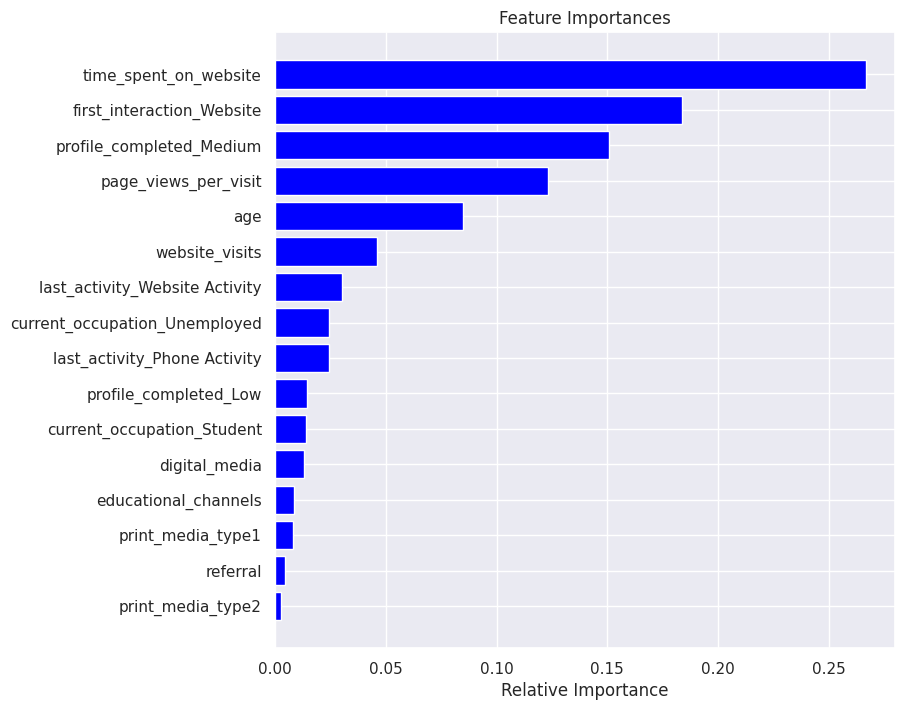

In [1040]:
feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color ='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The indentified features of importances are time spent on website, first visit

In [1041]:
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.71, 1: 1.67}, random_state=1)

para_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [5,10,20,25]
}
scorer = metrics.make_scorer(recall_score, pos_label = 1)
gridCV = GridSearchCV(dtree_estimator, para_grid, scoring = scorer, cv = 5)
gridCV.fit(X_train, y_train)

dtree_estimator = gridCV.best_estimator_
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.71, 1: 1.67}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



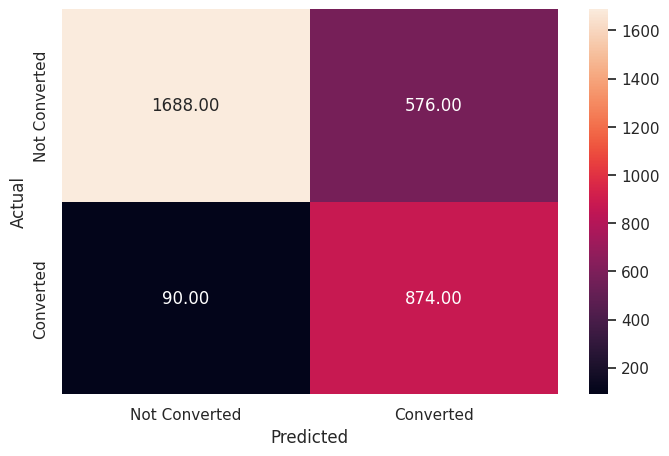

In [1042]:
y_train_pred_dt = dtree_estimator.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



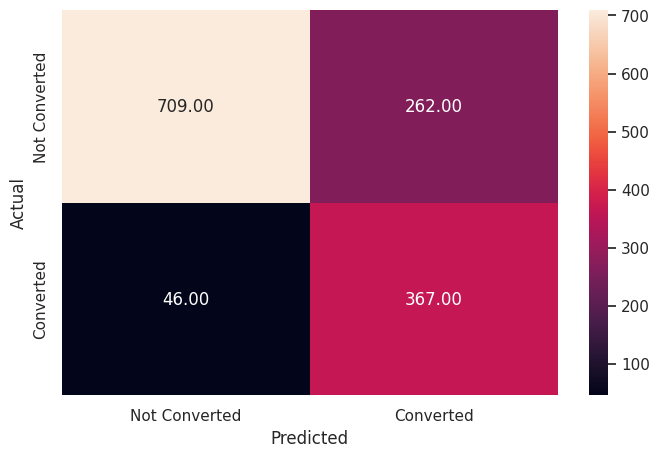

In [1043]:
y_test_pred_dt = dtree_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

The tuned model performs poorly compared to our defaults

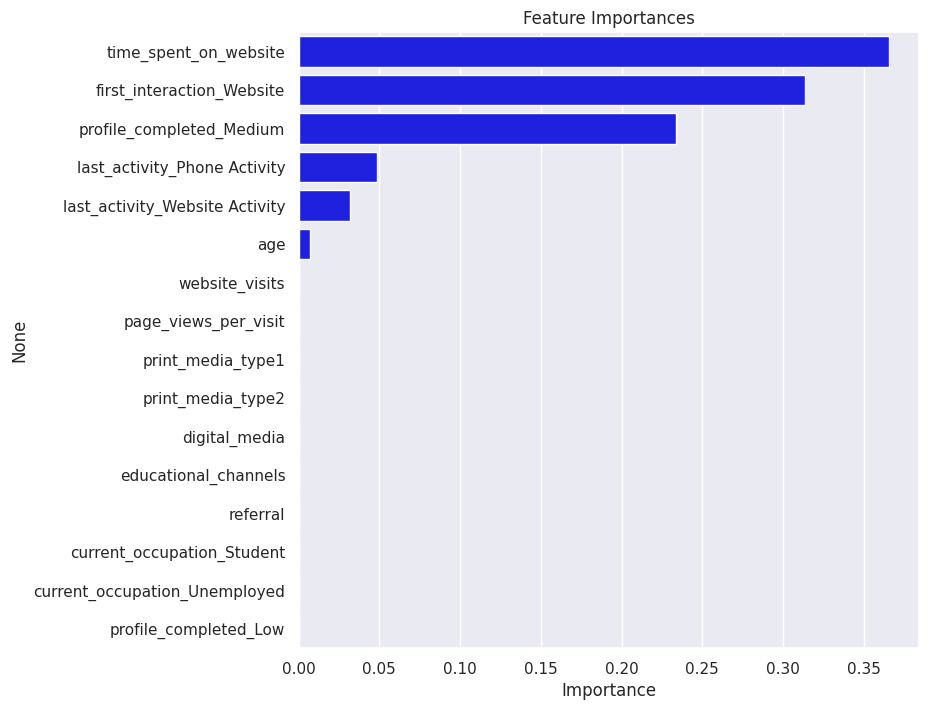

In [1044]:
importances = dtree_estimator.feature_importances_
columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(8,8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="blue")
plt.show()

*  Looking at the features, as previously identified time spent on website, website based, upward levels of profile completion, have high importance in as conversion, there's also a positive correlation with age.
*  An interesting discovery is the "last activity phone" feature, which may indicate tech saavy older users.

#Random Forest

In [1045]:
rf_estimator = RandomForestClassifier(class_weight = {0: 0.71, 1: 1.67}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.71, 1: 1.67}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



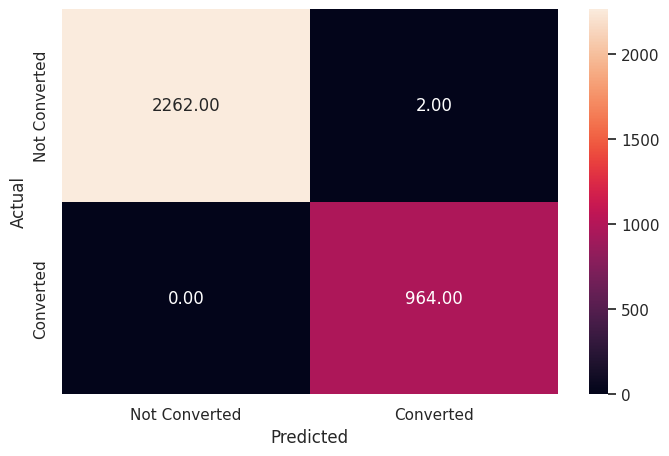

In [1046]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.80      0.72      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



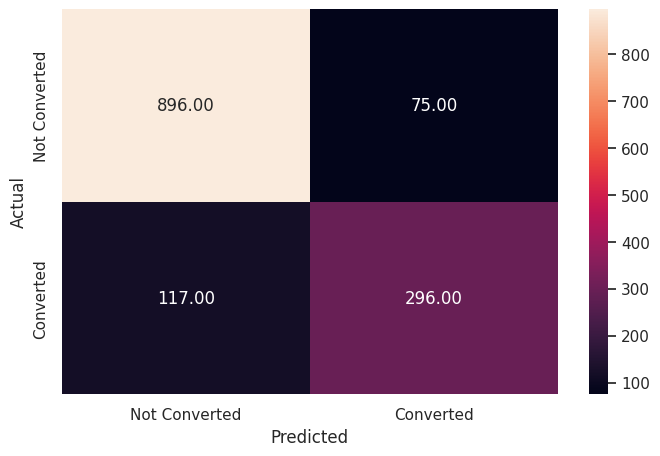

In [1047]:
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

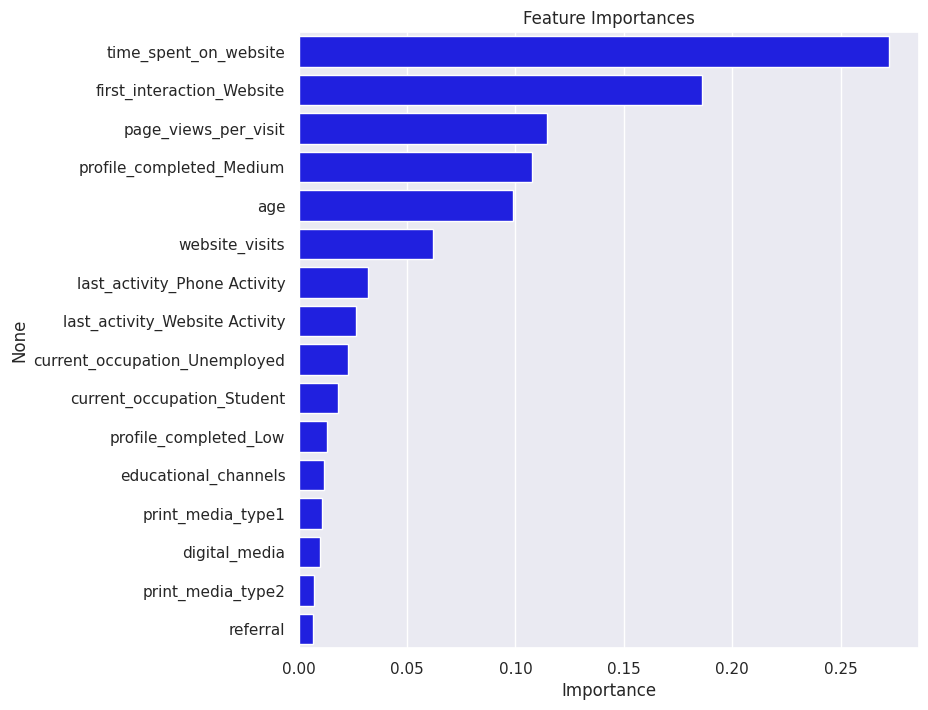

In [1048]:
importances = rf_estimator.feature_importances_
columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(8,8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="blue")

This information largely confirms the information found in our previous feature importance chart.

# Q & A

1.Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

A: Current occupation does infact have an impact on conversion with professionals being the mostly likely to convert.


2.The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
The company uses multiple modes to interact with prospects. Which way of interaction works ,best?

The educational channels large have no impact on prospect conversion. It seems that website based modes are one of the most impactful areas, magazines and digital media also have seen success.



3.The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

Reffrals are the leading channel of conversion. Emphasis on this method, by reaching out to previous conversion, or a referal incentive system may be of some benefit.  



4.People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

Yes, more complete profiles are a positive indicator of potential conversion. This is likely attributed to level of engage with the online platform and having additional details on the individual.